In [1]:
# 1.加载数据
import pandas as pd

features = pd.read_csv("./data/temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [2]:
# 2.查看数据大小及其描述
print("The shape of our features is:", features.shape)

The shape of our features is: (348, 9)


In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


无异常数据，可以直接用

In [4]:
# 3.处理时间数据
# Use datetime for dea1ing with dates
import datetime

# Get years, months, and days
years = features["year"]
months = features["month"]
days = features["day"]
# List and then convert to datetime object
dates = [
    str(int(year)) + "-" + str(int(month)) + "-" + str(int(day))
    for year, month, day in zip(years, months, days)
]
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

In [5]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [6]:
# 4.数据展示
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the styIe
plt.style.use("fivethirtyeight")

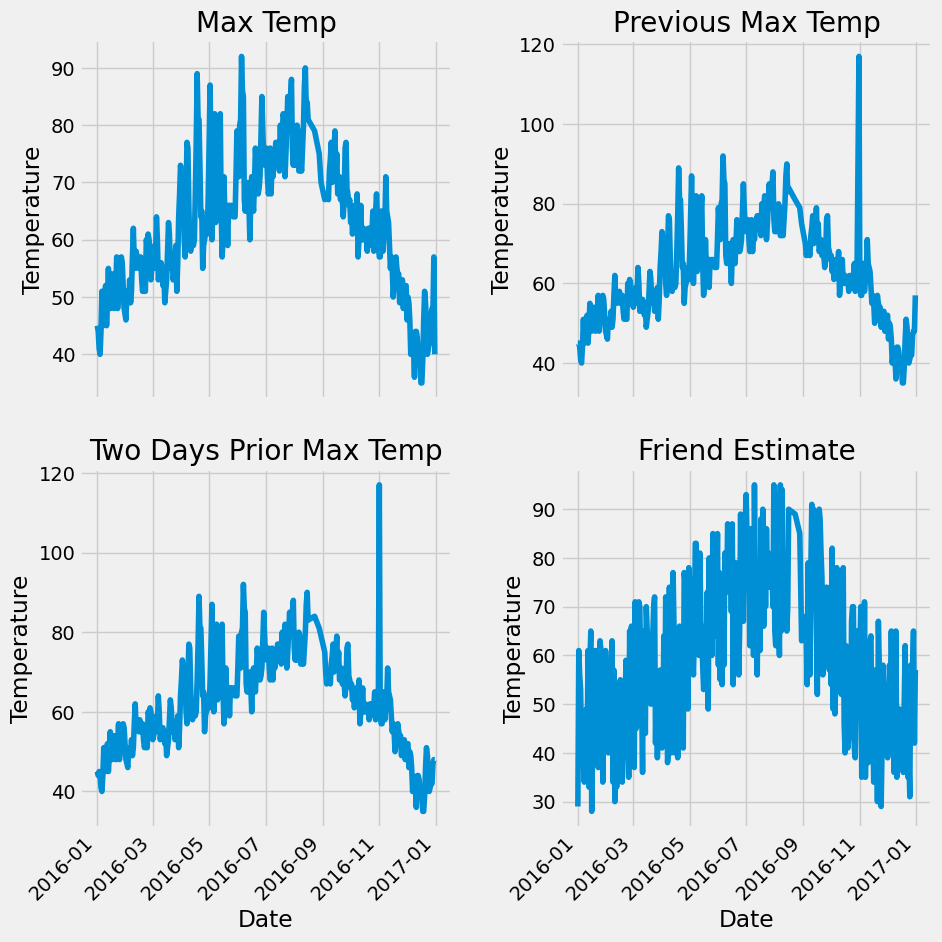

In [7]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)
# Actual max temperature measurement
ax1.plot(dates, features["actual"])
ax1.set_xlabel("")
ax1.set_ylabel("Temperature")
ax1.set_title("Max Temp")

# Temperature from 1 day ago
ax2.plot(dates, features["temp_1"])
ax2.set_xlabel("")
ax2.set_ylabel("Temperature")
ax2.set_title("Previous Max Temp")

# Temperature from 2 days ago
ax3.plot(dates, features["temp_2"])
ax3.set_xlabel("Date")
ax3.set_ylabel("Temperature")
ax3.set_title("Two Days Prior Max Temp")

# Friend Estimate
ax4.plot(dates, features["friend"])
ax4.set_xlabel("Date")
ax4.set_ylabel("Temperature")
ax4.set_title("Friend Estimate")
plt.tight_layout(pad=2)

In [8]:
# 5.数据预处理
# 采用独热编码对数据进行特征表示。
# One-hot encode ca tegorical fea tures
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [9]:
print("Shape of features after one hot encoding:", features.shape)

Shape of features after one hot encoding: (348, 15)


In [10]:
# 6.	提取出特征和标签
# Extract features and labeIs
labels = features["actual"]
features = features.drop("actual", axis=1)
# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

In [11]:
# 7.训练数据并测试模型
# Training and Testing Sets
# Import the mode1 we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.25, random_state=42
)
# Instantiate modeI
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the modeI on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print("Average model error:", round(np.mean(errors), 2), "degrees")
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 2), "%.")

Average model error: 3.83 degrees
Accuracy: 93.98 %.


In [12]:
# 8.特征降维—查看特征重要性
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(feature_list, importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print out the feature and importances
[print("Variable:{:20} Importance:{}".format(*pair)) for pair in feature_importances];

Variable:temp_1               Importance:0.69
Variable:average              Importance:0.2
Variable:day                  Importance:0.03
Variable:friend               Importance:0.03
Variable:temp_2               Importance:0.02
Variable:month                Importance:0.01
Variable:year                 Importance:0.0
Variable:week_Fri             Importance:0.0
Variable:week_Mon             Importance:0.0
Variable:week_Sat             Importance:0.0
Variable:week_Sun             Importance:0.0
Variable:week_Thurs           Importance:0.0
Variable:week_Tues            Importance:0.0
Variable:week_Wed             Importance:0.0


Text(0.5, 1.0, 'Variable Importances')

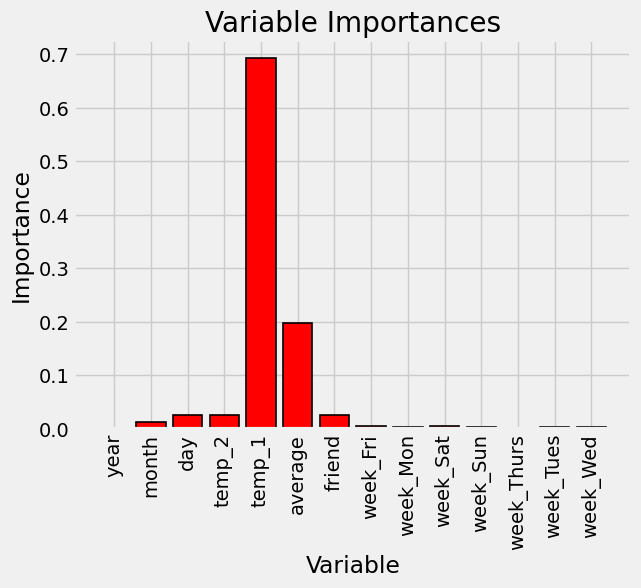

In [13]:
# 9.可视化特征重要性
# Reset style
plt.style.use("fivethirtyeight")
# list of x locations for pIotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(
    x_values,
    importances,
    orientation="vertical",
    color="r",
    edgecolor="k",
    linewidth=1.2,
)
# Tick labeIs for x axis
plt.xticks(x_values, feature_list, rotation="vertical")
# Axis IabeIs and title
plt.ylabel("Importance")
plt.xlabel("Variable")
plt.title("Variable Importances")

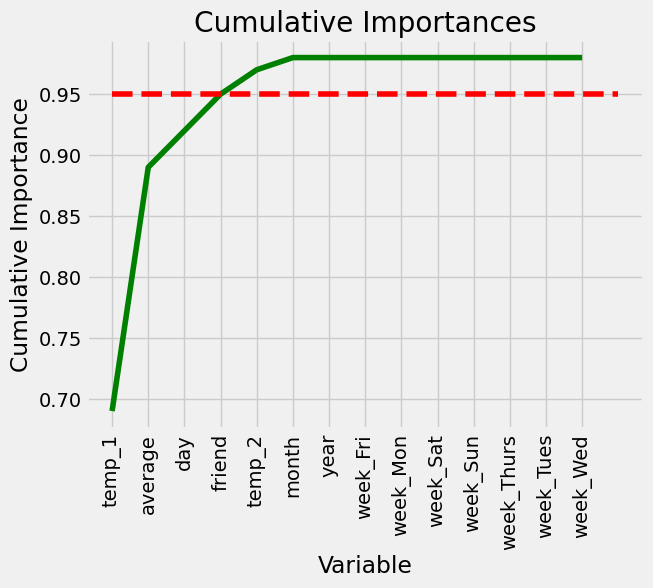

In [14]:
# 10.	特征重要性累加，看看95%之前有多少个
# List of features sorted from most to Ieast important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, "g-")
# Draw line at 95% of importance retained
plt.hlines(y=0.95, xmin=0, xmax=len(sorted_importances), color="r", linestyles="dashed")
# Format x ticks and labeIs
plt.xticks(x_values, sorted_features, rotation="vertical")
# Axis Iabels and title
plt.xlabel("Variable")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Importances");

In [15]:
# 11.前95%有5个，所以用这五个特征进行模型训练
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print(
    "Number of features for 95% importance:",
    np.where(cumulative_importances > 0.95)[0][0] + 1,
)

Number of features for 95% importance: 5


In [16]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important fea tures !
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important fea tures
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print("Important train features shape:", important_train_features.shape)
print("Important test features shape:", important_test_features.shape)

Important train features shape: (261, 5)
Important test features shape: (87, 5)


In [17]:
# Train the expanded mode1 on only the important fea tures
rf.fit(important_train_features, train_labels);

In [18]:
# Make predictions on test data
predictions = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions - test_labels)
print("Average absolute error:", round(np.mean(errors), 4), "degrees.")
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 2), "%.")

Average absolute error: 3.7184 degrees.
Accuracy: 94.11 %.


 用最重要的五个特征训练后的结果，优于用全部特征